<h2 align='center'>Principal Component Analysis for heart disease dataset</h2>

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [59]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [60]:
df.shape

(918, 12)

In [61]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [62]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Treating outliers**

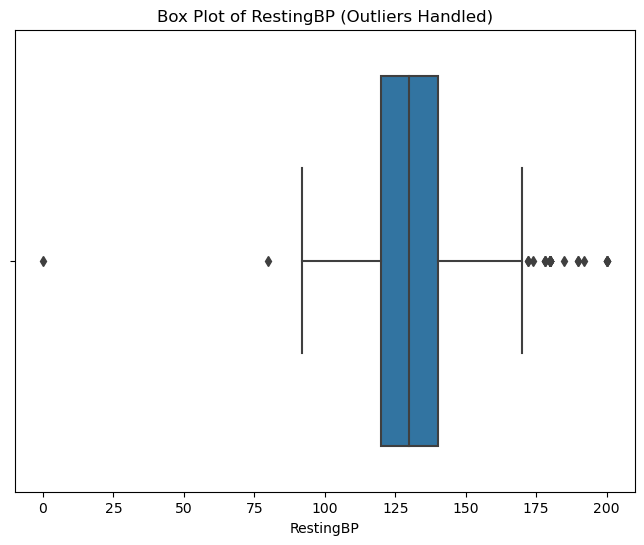

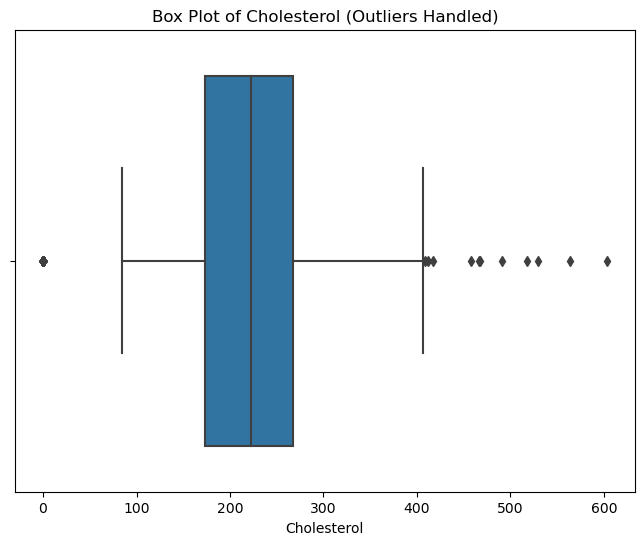

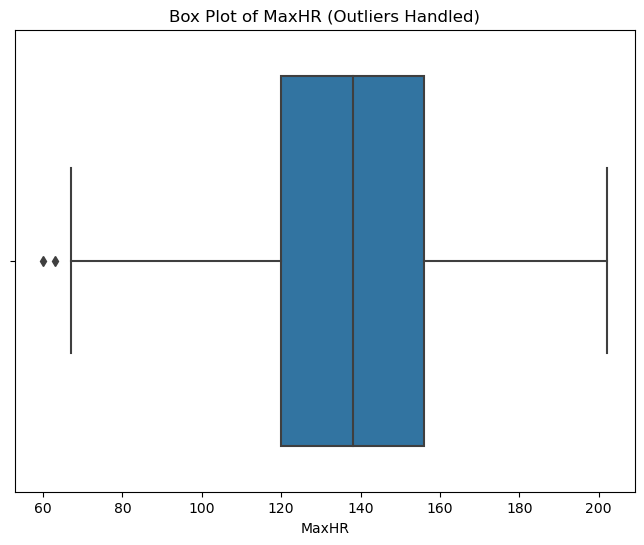

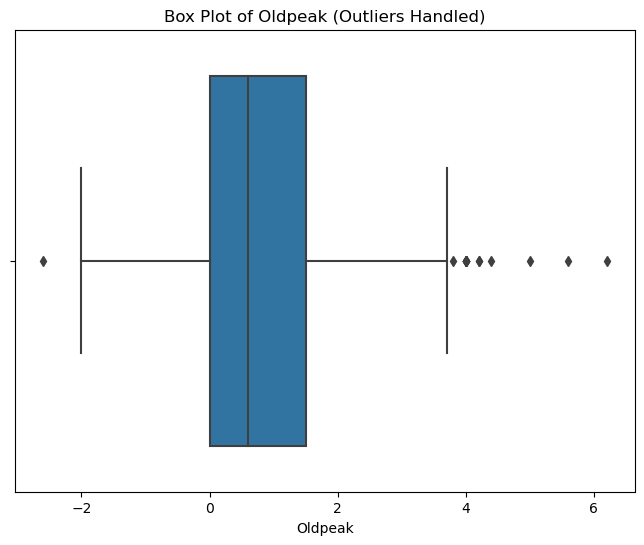

In [63]:
features = ['RestingBP','Cholesterol','MaxHR','Oldpeak']
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=feature, data=df)
    plt.title(f'Box Plot of {feature} (Outliers Handled)')
    plt.xlabel(feature)
    plt.show()

In [64]:
df[df.RestingBP>(df.RestingBP.mean() + 3*df.RestingBP.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [65]:
df[df.Cholesterol>(df.Cholesterol.mean() + 3*df.Cholesterol.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [66]:
df[df.MaxHR>(df.MaxHR.mean() + 3*df.MaxHR.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [67]:
df[df.Oldpeak>(df.Oldpeak.mean() + 3*df.Oldpeak.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [68]:
df1 = df[df.RestingBP<=(df.RestingBP.mean() + 3*df.RestingBP.std())]
df1.shape

(911, 12)

In [69]:
df2 = df1[df1.Cholesterol<=(df1.Cholesterol.mean() + 3*df1.Cholesterol.std())]
df2.shape

(908, 12)

In [70]:
df3 = df2[df2.Oldpeak<=(df2.Oldpeak.mean() + 3*df2.Oldpeak.std())]
df3.shape

(902, 12)

In [71]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [72]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [73]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [74]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [75]:
df4 = df3.copy()
df4.ExerciseAngina.replace(
    {
        'N': 0,
        'Y': 1
    },
    inplace=True)

df4.ST_Slope.replace(
    {
        'Down': 1,
        'Flat': 2,
        'Up': 3
    },
    inplace=True
)

df4.RestingECG.replace(
    {
        'Normal': 1,
        'ST': 2,
        'LVH': 3
    },
    inplace=True)

df4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,3,0
1,49,F,NAP,160,180,0,1,156,0,1.0,2,1
2,37,M,ATA,130,283,0,2,98,0,0.0,3,0
3,48,F,ASY,138,214,0,1,108,1,1.5,2,1
4,54,M,NAP,150,195,0,1,122,0,0.0,3,0


In [76]:
df5 = pd.get_dummies(df4, drop_first=True)
df5.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,0,True,True,False,False
1,49,160,180,0,1,156,0,1.0,2,1,False,False,True,False
2,37,130,283,0,2,98,0,0.0,3,0,True,True,False,False
3,48,138,214,0,1,108,1,1.5,2,1,False,False,False,False
4,54,150,195,0,1,122,0,0.0,3,0,True,False,True,False


In [77]:
df5 = df5.astype(int)
df5.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0,3,0,1,1,0,0
1,49,160,180,0,1,156,0,1,2,1,0,0,1,0
2,37,130,283,0,2,98,0,0,3,0,1,1,0,0
3,48,138,214,0,1,108,1,1,2,1,0,0,0,0
4,54,150,195,0,1,122,0,0,3,0,1,0,1,0


In [80]:
X = df5.drop('HeartDisease', axis='columns')
y = df5.HeartDisease

In [85]:
len(X)

902

In [82]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0,3,1,1,0,0
1,49,160,180,0,1,156,0,1,2,0,0,1,0
2,37,130,283,0,2,98,0,0,3,1,1,0,0
3,48,138,214,0,1,108,1,1,2,0,0,0,0
4,54,150,195,0,1,122,0,0,3,1,0,1,0


In [83]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int32

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.42896269,  0.46089071,  0.85238015, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-0.47545956,  1.5925728 , -0.16132855, ..., -0.4836591 ,
         1.86750159, -0.22914788],
       [-1.74679706, -0.10495034,  0.79657967, ...,  2.06757196,
        -0.53547478, -0.22914788],
       ...,
       [ 0.37209878, -0.10495034, -0.61703246, ..., -0.4836591 ,
        -0.53547478, -0.22914788],
       [ 0.37209878, -0.10495034,  0.35947592, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-1.64085227,  0.3477225 , -0.20782894, ..., -0.4836591 ,
         1.86750159, -0.22914788]])

**Using the classic train_test_split method**

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=30)

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [95]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.8362831858407079

In [96]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.8451327433628318

In [97]:
model3 = SVC()
model3.fit(X_train, y_train)
model3.score(X_test, y_test)

0.8451327433628318

<h3>Use PCA to reduce dimensions</h3>

In [98]:
X

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0,3,1,1,0,0
1,49,160,180,0,1,156,0,1,2,0,0,1,0
2,37,130,283,0,2,98,0,0,3,1,1,0,0
3,48,138,214,0,1,108,1,1,2,0,0,0,0
4,54,150,195,0,1,122,0,0,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,1,132,0,1,2,1,0,0,1
914,68,144,193,1,1,141,0,3,2,1,0,0,0
915,57,130,131,0,1,115,1,1,2,1,0,0,0
916,57,130,236,0,3,174,0,0,2,0,1,0,0


<h4>Use components such that 95% of variance is retained</h4>

In [148]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(902, 2)

In [149]:
pca.explained_variance_ratio_

array([0.92011891, 0.05065988])

In [150]:
pca.n_components_

2

**PCA created 2 components out of 13 original columns**

In [102]:
X_pca

array([[ 93.82478115, -29.39921669],
       [-15.58419376, -14.10832145],
       [ 83.29619046,  38.68934272],
       ...,
       [-67.57323027,  17.61278358],
       [ 40.70470825, -33.38587579],
       [-19.91355882, -37.28925155]])

In [103]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=30)

In [106]:
model11 = LogisticRegression(max_iter=1000)
model11.fit(X_train_pca, y_train)
model11.score(X_test_pca, y_test)

0.6769911504424779

In [108]:
model22 = RandomForestClassifier()
model22.fit(X_train_pca, y_train)
model22.score(X_test_pca, y_test)

0.7123893805309734

In [109]:
model33 = SVC()
model33.fit(X_train_pca, y_train)
model33.score(X_test_pca, y_test)

0.7079646017699115

**Let's now select only two components**

In [142]:
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X)
X_pca.shape

(902, 7)

In [143]:
X_pca

array([[ 93.82478115, -29.39921669, -11.58732474, ...,  -0.54904386,
         -0.50098907,  -0.18475199],
       [-15.58419376, -14.10832145, -31.68085319, ...,   0.3306303 ,
         -0.59732887,   0.1905657 ],
       [ 83.29619046,  38.68934272,  15.39661334, ...,  -0.93984566,
          0.8637445 ,  -0.74425173],
       ...,
       [-67.57323027,  17.61278358,   4.35224139, ...,   0.31388888,
         -0.56525328,   0.19356926],
       [ 40.70470825, -33.38587579,  -5.99424447, ...,  -0.36931432,
          1.16483715,   0.17759501],
       [-19.91355882, -37.28925155, -13.31436483, ...,  -0.38027277,
         -0.31892929,   0.11307719]])

In [144]:
pca.explained_variance_ratio_

array([9.20118909e-01, 5.06598754e-02, 2.35752790e-02, 5.44090498e-03,
       7.49336331e-05, 4.74301782e-05, 1.99420241e-05])

In [145]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=30)
model = LogisticRegression()
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)


0.8407079646017699

In [146]:
model = RandomForestClassifier()
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.8539823008849557

In [147]:
model = SVC()
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.7212389380530974

We get less accuancy as using only 2 components (PCA default components for retaining 95% of the information) did not retain much of the feature information. However in real life you will find many cases where using 2 or few PCA components can still give you a pretty good accuracy